# Necessary Imports

In [76]:
# helps for scientific computing: ndarray, etc.
import numpy as np

# helps create new data structure called data frames
import pandas as pd

# helps for plotting visualization
import matplotlib.pyplot as plt

# sklearn is for machine learning
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# About the dataset

There are 30 predictors (relevant column / attributes) excluding the ID column in each 214 rows (instances/records).

|Field Name|Description|
|---|---|
| ID | patient identification number|
| Age | age in years |
| EducationLevel | Education level ( 1=High School; 2=Diploma; 3=Undergraduate; 4=Bachelor degree; 5=Master degree; 6=Post-graduate) |
| Gender | sex (1 = male; 0 = female) |
| HasFamilyHistory | Family history of anxiety or depression (1 = yes; 0 = no) |
| Occupation | (1=Student; 2=Faculty member; 3=Employee; 4=self-employment; 5=Unemployed ) |
| ATF | The fear of being at the center of attention (Range=0-10) |
| EAF | The fear of eating in front of another person (Range=0-10) |
| TKF | The fear of speaking in public (Range=0-10) |
| CMT | The fear of attending parties (Range=0-10) |
| DEF | The fear of eating and drinking in public places(Range=0-10) |
| SMF | The fear of meeting or contact with strangers (Range=0-10) |
| ERF | The fear of getting in a room where others are sitting (Range=0-10) |
| DAF | The fear of disagreement with strangers (Range=0-10) |
| HR | Has heart palpitations (1=yes; 0=no ) |
| SW | Has sweating (1=yes; 0=no ) |
| TR | Has a tremor (1=yes; 0=no ) |
| DR | Has dry mouth (1=yes; 0=no ) |
| BR | Has hard breathing (1=yes; 0=no ) |
| CK | Has  a feeling of suffocation (1=yes; 0=no ) |
| CP | Has chest pain (1=yes; 0=no ) |
| NS | Has gastrointestinal discomfort and nausea (1=yes; 0=no ) |
| DZ | Has a feeling of dizzy, weak and sick (1=yes; 0=no ) |
| UR | Has a feeling of being unreal (1=yes; 0=no ) |
| UB | Has a fear of losing balance (1=yes; 0=no ) |
| MD | Has a fear of being crazy (1=yes; 0=no ) |
| TG | Has numbness or moaning (1=yes; 0=no ) |
| hasSAD | (1=yes; 0=no) |
| SPIN | The result of the Social Phobia Inventory questionnaire (Range=0-68) |
| LSAS | The result of the Liebowitz Social Anxiety Scale questionnaire (Range=0-144) |




# Load data from CSV File

In [2]:
sad_df = pd.read_csv('dataset.csv')

sad_df.tail()
sad_df.head()

# (214, 30)
sad_df.shape

# tells how many records are present in an attribute/column
sad_df.count()

# tells how many values are present in an attribute/column
# 60:40 slightly imbalance
# 90:10 severe imbalance
# 51% : 48%
# 111 : 103
sad_df['hasSAD'].value_counts(normalize=False)


sad_df.dtypes

id                    int64
Age                   int64
EducationLevel        int64
Gender                int64
HasFamilyHistory      int64
Occupation            int64
ATF                   int64
EAF                   int64
TKF                   int64
CMT                   int64
DEF                   int64
SMF                   int64
ERF                   int64
DAF                   int64
HR                    int64
SW                    int64
TR                    int64
DR                    int64
BR                    int64
CK                    int64
CP                    int64
NS                    int64
DZ                    int64
UR                    int64
UB                    int64
MD                    int64
TG                    int64
hasSAD                int64
SPIN                  int64
LSAS                float64
dtype: object

# Distribution of classes

<AxesSubplot:xlabel='ATF', ylabel='EAF'>

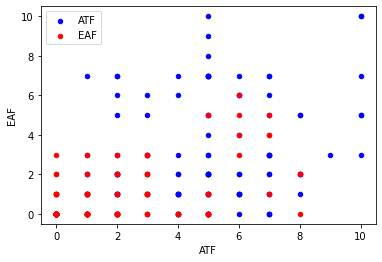

In [3]:
# get the records/rows in an attribute that satisfies the condition
positive_df = sad_df[ sad_df['hasSAD'] == 1 ]
negative_df = sad_df[ sad_df['hasSAD'] == 0 ]

# creates a scatter plot, x and y values should be a valid field name in the dataframe
# returns axes
axes = positive_df.plot(kind='scatter', x = 'ATF', y = 'EAF', label = 'ATF', color = 'blue')
negative_df.plot(kind='scatter', x = 'ATF', y = 'EAF', label = 'EAF', color = 'red', ax = axes)


# Identifying unwanted rows

In [4]:
# dtypes are of int64 so we don't have a problem here
sad_df.dtypes

# replaces NaN to 0
sad_df.fillna(inplace = True, value = 0)

# Remove unwanted columns/attributes

We now try to separate columns/attributes to independent and dependent columns.

In [5]:
'''
['id', 'Age', 'EducationLevel', 'Gender', 'HasFamilyHistory',
       'Occupation', 'ATF', 'EAF', 'TKF', 'CMT', 'DEF', 'SMF', 'ERF', 'DAF',
       'HR', 'SW', 'TR', 'DR', 'BR', 'CK', 'CP', 'NS', 'DZ', 'UR', 'UB', 'MD',
       'TG', 'hasSAD', 'SPIN', 'LSAS']
'''
# shows the columns of the data frames
sad_df.columns

# Drop ID column and we dont need hasSAD column for the independent attributes
# Selects only columns that are in the array
relevant_features_df = sad_df[ ['Age', 'EducationLevel', 'Gender', 'HasFamilyHistory',
       'Occupation', 'ATF', 'EAF', 'TKF', 'CMT', 'DEF', 'SMF', 'ERF', 'DAF',
       'HR', 'SW', 'TR', 'DR', 'BR', 'CK', 'CP', 'NS', 'DZ', 'UR', 'UB', 'MD',
       'TG', 'SPIN', 'LSAS'] ]

relevant_features_df

# convert data frames to ndarray to be used in the cross validation, training and testing
# independent variable, X : Uppercase X means 2D array
X = np.asarray(relevant_features_df)

# dependent variable, y : lowercase y means 1D array
y = np.asarray(sad_df['hasSAD'])

# Preparing the model by creating a classifier
[https://scikit-learn.org/stable/modules/svm.html](https://scikit-learn.org/stable/modules/svm.html)

gamma:  how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

C: trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.

To get the best gamma and C values, one must perform [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

In [79]:
# hyperparameter tuning: change parameters for this model
# clf = DecisionTreeClassifier(max_depth=10, random_state=42)
# clf = RandomForestClassifier(max_depth=2, random_state=42)
# clf = svm.SVC(kernel='linear')
# clf = LogisticRegression(random_state=42, max_iter=400)

clf = KNeighborsClassifier(n_neighbors = 4)

# K-Fold Cross Validation

In [80]:
kfold = KFold(n_splits=10)

# create a scorer for each metric
accuracy = metrics.make_scorer(metrics.accuracy_score)
precision = metrics.make_scorer(metrics.precision_score)
recall = metrics.make_scorer(metrics.recall_score)
f1 = metrics.make_scorer(metrics.f1_score)

# evaluate accuracy, precision, recall, f1 scores using cross_val_score()
accuracy_score = cross_val_score(clf, X, y, scoring = accuracy, cv = kfold)
precision_score = cross_val_score(clf, X, y, scoring = precision, cv = kfold)
recall_score = cross_val_score(clf, X, y, scoring = recall, cv = kfold)
f1_score = cross_val_score(clf, X, y, scoring = f1, cv = kfold)


# display scores for each metrics
'''
svm.SVC() with default kernel = 'rbf'
make_scorers with average = 'macro'

accuracy score: 0.9495670995670995
precision score: 0.956067461949815
recall score: 0.9550000000000001
f1 score: 0.9536114718614719
'''

'''
svm.SVC() with kernel = 'linear'
make_scorers with average = 'macro'

accuracy score: 0.9679653679653679
precision score: 0.9695020053475936
recall score: 0.9633116883116883
f1 score: 0.9649963645678692
'''

'''
svm.SVC() with kernel = 'linear'
make_scorers with default average
accuracy score: 0.9679653679653679
precision score: 0.9755681818181818
recall score: 0.96
f1 score: 0.9664296255726347
'''
print("accuracy score:", round(accuracy_score.mean(), 2))
print("precision score:", round(precision_score.mean(), 2))
print("recall score:", round(recall_score.mean(), 2))
print("f1 score:", round(f1_score.mean(), 2))


accuracy score: 0.95
precision score: 0.97
recall score: 0.94
f1 score: 0.95


# Helper functions

We need to create helper functions that get actual and predicted classes for each iteration of the cross validation. Remember that in a cross validation, each iteration will have different train and test sets, thus, we have to get those actual classes and predicted classes during that period. We compile all actual classes and predicted classes for all iteration to be passed on the confusion matrix. We have to do this so that we can see the performance of the model during the cross validation.

In [12]:
# importing libraries

import copy as cp
import seaborn as sns
from typing import Tuple

In [22]:
# calculate the predicted and actual classes
# by creating a helper function

'''
cross_val_predict helper function does the ff:
    1. Takes a local (deep) copy of the machine learning algorithm (model) to 
        avoid changing the one passed in
    2. Iterates around the k cross-validation data folds (given that n_splits = k)
    3. For each of the k splits, do the ff:
        a. extracts the rows from the data for the training features, training target,
            test features, and test target
        b. appends the actual target classifications to `actual_classes`
        c. Fits the machine learning model using the training data extracted from the
            current fold
        d. uses the fitted model to predict the target classifications for the test data
            in the current fold
        e. appends the predicted classes for the current fold of test data to `predicted_classes`
    4. The helper function returns the full set of actual and predicted classes (classifications)
        that can be used to plot a confusion matrix
'''

def cross_val_predict(
    model, 
    kfold : KFold, 
    X : np.array, 
    y : np.array
) -> Tuple[np.array, np.array]:
    
    model_ = cp.deepcopy(model)
    
    # gets the number of classes [0, 1] in the column/attribute
    no_of_classes = len(np.unique(y))
    
    # initializing empty numpy arrays to be returned
    actual_classes = np.empty([0], dtype = int)
    predicted_classes = np.empty([0], dtype = int)
    
    '''
    for train_index, test_index in \ 
        kfold.split([0,1,2,3,4,5,6,7,8,9]) should
    look like the below:
    [1 2 3 4 5 6 7 8 9] [0]
    [0 2 3 4 5 6 7 8 9] [1]
    [0 1 3 4 5 6 7 8 9] [2]
    [0 1 2 4 5 6 7 8 9] [3]
    [0 1 2 3 5 6 7 8 9] [4]
    [0 1 2 3 4 6 7 8 9] [5]
    [0 1 2 3 4 5 7 8 9] [6]
    [0 1 2 3 4 5 6 8 9] [7]
    [0 1 2 3 4 5 6 7 9] [8]
    [0 1 2 3 4 5 6 7 8] [9]
    '''
    
    for train_index, test_index in kfold.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # append the actual classes : [...] for this iteration
        actual_classes = np.append(actual_classes, y_test)
        
        # fit the model
        model_.fit(X_train, y_train)
        
        # predict
        predicted_classes = np.append(predicted_classes, model_.predict(X_test))
        
    return actual_classes, predicted_classes   

# Evaluating results 
[Interpreting classification report](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn)


[Accuracy Paradox](https://deepchecks.com/how-to-check-the-accuracy-of-your-machine-learning-model/)
The default form of accuracy gives an overall metric about model performance on the whole dataset.

However, overall accuracy can be misleading when the class distribution is imbalanced, and it is critical to predict the minority class correctly.

For example, in cancer prediction, we cannot miss malignant cases. Neither should we diagnose benign ones as malignant. Doing so would put healthy people through serious treatment and decrease trust in the whole diagnostic process.

[Micro, Macro, Weighted Averages](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f)
- Definition of Precision, Recall, f1 scores and how to calculate them.
- Which average should I choose?
- Explains why there is no accuracy for precision and recall
- IMPORTANT TO READ

In [66]:
# call the helper functions
actual_classes, predicted_classes = cross_val_predict(clf, kfold, X, y)

# display the classification report
print(metrics.classification_report(y_true = actual_classes, y_pred = predicted_classes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       103
           1       0.97      0.97      0.97       111

    accuracy                           0.97       214
   macro avg       0.97      0.97      0.97       214
weighted avg       0.97      0.97      0.97       214



# Confusion Matrix

In [24]:
'''
    plot_confusion_matrix helper function uses sklearn.metrics.confusion_matrix to
    calculate the matrix followed by a seaborn `heatmap` to show it in a nice format
    that helps to fully understand the performance of the algorithm through visualization.
'''
def plot_confusion_matrix(
    actual_classes : np.array,
    predicted_classes : np.array,
    display_labels : list
):
    
    cm = metrics.confusion_matrix(y_true = actual_classes, y_pred = predicted_classes)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = display_labels)
    cm_display.plot()    

confusion matrix accuracy: 0.97
confusion matrix precision: 0.97
confusion matrix recall: 0.97
confusion matrix f1 score: 0.97


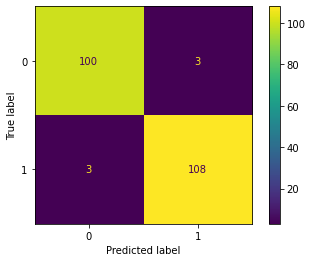

In [82]:
# plot the confusion matrix
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])


'''
[   
    [TN, FP]
    [FN, TP]
]
'''
TN = 100
FP = 3
FN = 3
TP = 108

'''
When I calculate precision, recall, and f1 through CV cross_val_score() [Above the Helper Function cell], 
it gives me different results than when I calculate through the confusion matrix. 
Why does it give different precision, recall, and f1 scores?

For cross_val_score you take the mean of the prediction, 
while for your manual cv you calculated the metric over the concatenated predictions/targets. 
Accuracy is not sensitive to this difference, however precision, recall and f1 score are. 
Try again by calculating the metrics over each fold and then averaging, you should have the same scores.

source: https://stackoverflow.com/questions/73049155/sklearn-model-selection-cross-val-score-has-different-results-from-a-manual-calc?noredirect=1#comment129040471_73049155
'''

print("confusion matrix accuracy:", round((TP + TN) / (TP + FP + TN + FN), 2))
print("confusion matrix precision:", round(TP / (TP + FP), 2))
print("confusion matrix recall:", round(TP / (TP + FN), 2))
print("confusion matrix f1 score:", round(TP / (TP + ((FP + FN) / 2) ), 2))

But the purpose of cross-validation is not to come up with our final model. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.

[https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation](https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation)

# Deploying the model

[https://www.youtube.com/watch?v=p_tpQSY1aTs](https://www.youtube.com/watch?v=p_tpQSY1aTs)

In [200]:
import pickle


cross_val_score(clf, X, y, cv = kfold).mean()

# open the file where we want to store our trained model
file = open('sad_test_model.pkl', 'wb')

# dump information to that file
pickle.dump(clf, file)




In [75]:
clf.fit(X, y)


LogisticRegression(max_iter=400, random_state=42)